In [1]:
import os
#import pylab as pl
import numpy as np
#import tensorflow as tf
#import scipy.optimize as opt
#from sklearn import preprocessing
#from sklearn.cross_validation import train_test_split - Not used anymore thats why causes an error
#from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
training_data = pd.read_excel (r"C:\Users\MCSL-user\OneDrive\Data Sets for Machine Learning\Data Acquired - Sensor\Training_Data_First.60(F)_Last.60(N).xlsx") #gets the data from PC
training_data.head() #Displays data - First 60% Drift fault - Last 60% Normal Data 

,Max,Mean,Label
0,49.9,31.525,0
1,49.9,31.521,0
2,49.8,31.481,0
3,49.9,31.499,0
4,49.9,31.525,0


In [3]:
training_data.describe() #Returns the statistical summary of Numerical Data

,Max,Mean,Label
count,120.000000,120.000000,120.000000
mean,37.605833,28.403867,0.500000
std,12.279198,3.083665,0.502096
min,25.100000,25.002000,0.000000
25%,25.400000,25.372000,0.000000
50%,37.750000,28.548500,0.500000
75%,49.825000,31.493000,1.000000
max,50.500000,32.095000,1.000000


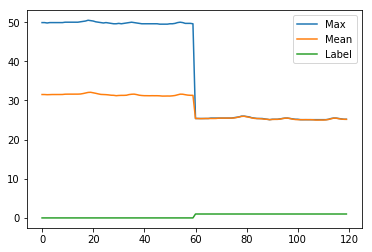

In [4]:
training_data.plot(kind='line')
plt.show() # First 60% Drift fault - Last 60% Normal Data - Total=120 Rows

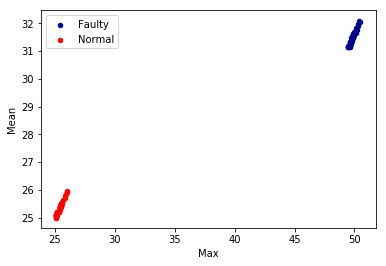

In [5]:
ax = training_data[training_data['Label'] == 0][0:100].plot(kind='scatter', x='Max', y='Mean', color='DarkBlue', label='Faulty');
training_data[training_data['Label'] == 1][0:100].plot(kind='scatter', x='Max', y='Mean', color='Red', label='Normal', ax=ax);
plt.show()

In [6]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4) #40% of data for test

X_train = training_data[['Max','Mean']]
y_train = training_data[['Label']]

In [7]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train.values.ravel()) #.ravel() func. accepts values as 2D as 1D was expected by the model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
testing_data = pd.read_excel (r"C:\Users\MCSL-user\OneDrive\Data Sets for Machine Learning\Data Acquired - Sensor\Testing_Data_First.40(F)_Last.40(N).xlsx")
testing_data.describe()

,Max,Mean,Label
count,80.000000,80.000000,80.000000
mean,37.591250,28.378050,0.500000
std,12.316986,3.095734,0.503155
min,25.000000,24.998000,0.000000
25%,25.200000,25.200000,0.000000
50%,37.700000,28.511500,0.500000
75%,49.700000,31.325000,1.000000
max,50.400000,32.025000,1.000000


In [9]:
X_test = testing_data[['Max','Mean']]
y_test = testing_data[['Label']]

In [10]:
svclassifier.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
y_pred = svclassifier.predict(X_test)

In [12]:
svclassifier.score(X_test, y_test) #Accuracy score 100%

1.0

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
#print(classification_report(y_test,y_pred))

[[40  0]
 [ 0 40]]


In [14]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [15]:
# Now we are gonna use Pickle or Joblib API which actually helps in not training the model each time we run the program.
import pickle

with open('Pickle_SVM_model_Fault_Classification','wb') as f: #wb=write binary
    pickle.dump(svclassifier,f)

In [16]:
with open('Pickle_SVM_model_Fault_Classification','rb') as f:
    SVM_prediction = pickle.load(f)

In [17]:
SVM_prediction.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [18]:
SVM_prediction.score(X_test, y_test)#We got same accuracy asw above, but using not training.Yahooo! :D

1.0

In [67]:
#Just for testing purposes
#[1] means Normal-Signal and [0] means Faulty-Signal
Max = 37
Mean = 28
test = [Max,Mean]
#print (test)
SVM_prediction.predict([test])

array([1], dtype=int64)